Grupo 3: David Davó Laviña, Ela Shepherd Arévalo

In [ ]:
import numpy as np
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
custom_palette = ["#ff2cef", "#1fcc42"]
sns.set_palette(custom_palette)
np.random.seed(0x2A)

#Visualización de los datos

In [ ]:
from sklearn.datasets import load_breast_cancer
br = load_breast_cancer()
br.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print ('Propiedades: ', br['feature_names'])
print ('Tipos de clases: ', br['target_names'])
print ('Número de instancias, Número de propiedades: ', br['data'].shape)

Propiedades:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Tipos de clases:  ['malignant' 'benign']
Número de instancias, Número de propiedades:  (569, 30)


In [ ]:
df = pd.DataFrame(data=br['data'], columns=br['feature_names']) 
df.head().transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


Los datos que analizaremos esta vez es un conjunto de medidas que describen una serie de cientos de tumores. Hay 10 propiedades (radio, textura, perímetro)... y por cda una, 3 valores (valor medio, desviación típica, valores extremos). Por tanto tenemos un dataframe extenso con más de 500 instancias y 30 variables.

In [ ]:
df['tumor_type'] = br['target']
df['tumor_type'].value_counts() / df['tumor_type'].count() * 100

1    62.741652
0    37.258348
Name: tumor_type, dtype: float64

Esto significa que un 62,7% de las veces, el tumor es benigno (la primera fila es 'benign' y la segunda 'malignant') y el 37,3% de las veces es maligno.

In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
sns.pairplot(df, corner=True, hue="tumor_type", height=3) #en color rosa los malignos, en color verde los benignos

Visualmente, parece haber cierta correlación entre:
- Mean perimeter <-> Mean radius (vemos claramente una relación lineal)
- Mean area <-> Mean radius 
- Worst radius <-> Mean radius
- Worst perimeter <-> Mean radius
- Worst area <-> Worst radius
- Worst texture <-> Mean texture
- Mean area <-> Mean perimeter
- Worst radius <-> Mean perimeter
- Worst perimeter <-> Mean perimeter
- Worst area <-> Mean perimeter
...

Básicamente, vemos que existe una relación el `worst_*` con el `mean_*`. También están relacionados el perímetro, el área, y el radio. 

Si hiciésemos un k-NN basándonos en la esta visualización, no eligiríamos variables que tuviesen una relación lineal tn clara.

## Creando un Árbol de Decisión
Estandarizar o normalizar las variables para un árbol de decisión no afecta el árbol de decisión, por lo tanto no es necesario: aun así, puede ser útil normalizarlas para visualización y manipulación.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(br.data, br.target, test_size=0.30, stratify=br.target)
clfe = DecisionTreeClassifier(criterion="entropy")
clfg = DecisionTreeClassifier(criterion="gini") # Default
clfe = clfe.fit(X_train, y_train)
clfg = clfg.fit(X_train, y_train)

print("Gini: train %f, test %f" % (clfg.score(X_train, y_train), clfg.score(X_test, y_test)))
print("Entropy: train %f, test %f" % (clfe.score(X_train, y_train), clfe.score(X_test, y_test)))

Gini: train 1.000000, test 0.906433
Entropy: train 1.000000, test 0.918129


Lo que mostramos en la celda anterior es la exactitud en la fase de entrenamiento y en la fase de prueba.

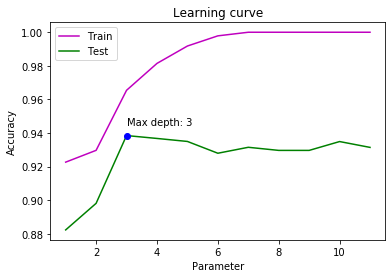

In [ ]:
from sklearn.model_selection import cross_validate
train_accu = []
test_accu = []
max_depths = range(1,12)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, br.data, br.target, scoring = 'accuracy', cv = 10, return_train_score=True)
    train_accu.append(np.mean(scores['train_score']))
    test_accu.append(np.mean(scores['test_score']))
#--------------------------------------------
plt.plot(max_depths, train_accu, color = "m", label="Train")
plt.plot(max_depths, test_accu, color = "g", label="Test")
plt.title("Learning curve")
plt.xlabel("Parameter") 
plt.ylabel("Accuracy")
plt.legend(loc="best")

testmax = max(test_accu)
depthmax = max_depths[test_accu.index(testmax)]

plt.plot(depthmax, testmax, 'bo')
plt.annotate("Max depth: %d" % (int(depthmax)), (depthmax, testmax), xytext=(0, 10), textcoords="offset pixels")

plt.show()

El valor óptimo de la profundidad del árbol, antes de que se produzca *overfitting* o sobreaprendizaje será de entre 3 y 4. A partir de ahí, sigue subiendo la exactitud en el conjunto de entrenamiento, pero disminuyendo en el de pruebas.

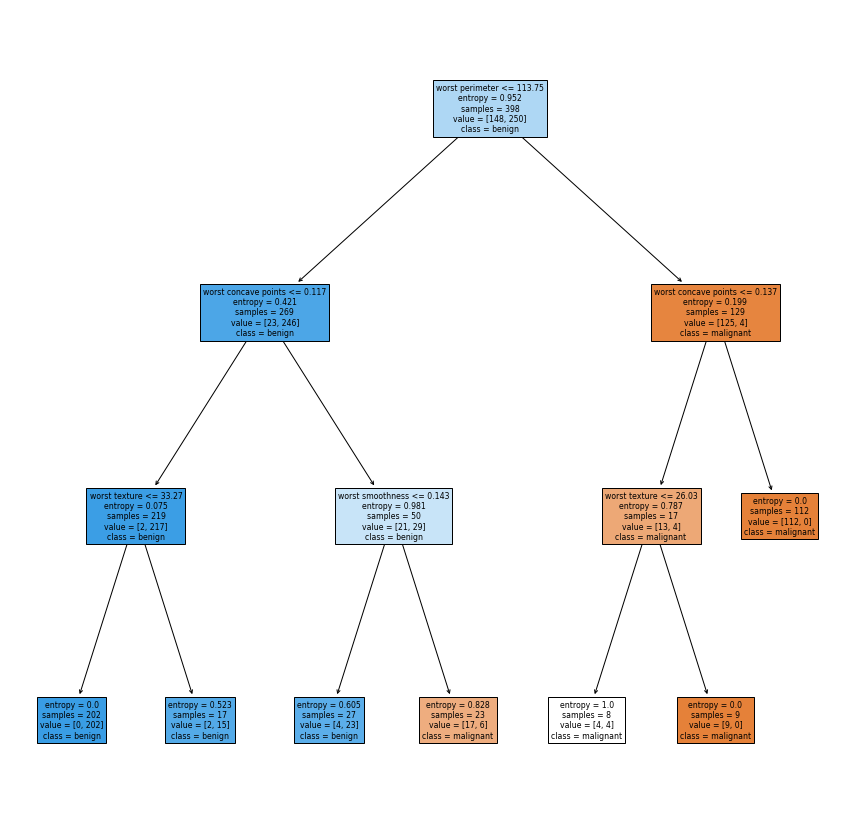

In [ ]:
plt.figure(figsize=(15,15))
clf = DecisionTreeClassifier(criterion="entropy", max_depth=depthmax, min_samples_split=2 )
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True, feature_names=br.feature_names, class_names=br.target_names)
plt.show()
#Árbol óptimo

De las 2 primeras alturas del árbol sabemos que el tumor tiene una alta probabilidad de ser benigno si el perímetro está por debajo de 113.75, y maligno en caso contrario. Podemos hacer más preguntas para obtener mayor precisión sobre la probabilidad de que sea benigno o maligno.

El perímetro y los puntos cóncavos son variables muy discriminantes, pero también lo son la suavidad o la textura.

El árbol no ha usado ninguna de las medidas `mean`, ni otras medidas de dimensión que pueden estar correlacionadas con el perímetro.

Los dos nodos hoja de más a la derecha parecen muy poco generalizables, pues tienen tan sólo 8 y 9 muestras.

Si creamos un árbol que sobreaprenda, los nodos que aparecerán identificarán clases con muy pocas muestras (entre 1 y 5) que identificarán a los pocos casos que no se ajusten bien al modelo (outliers).

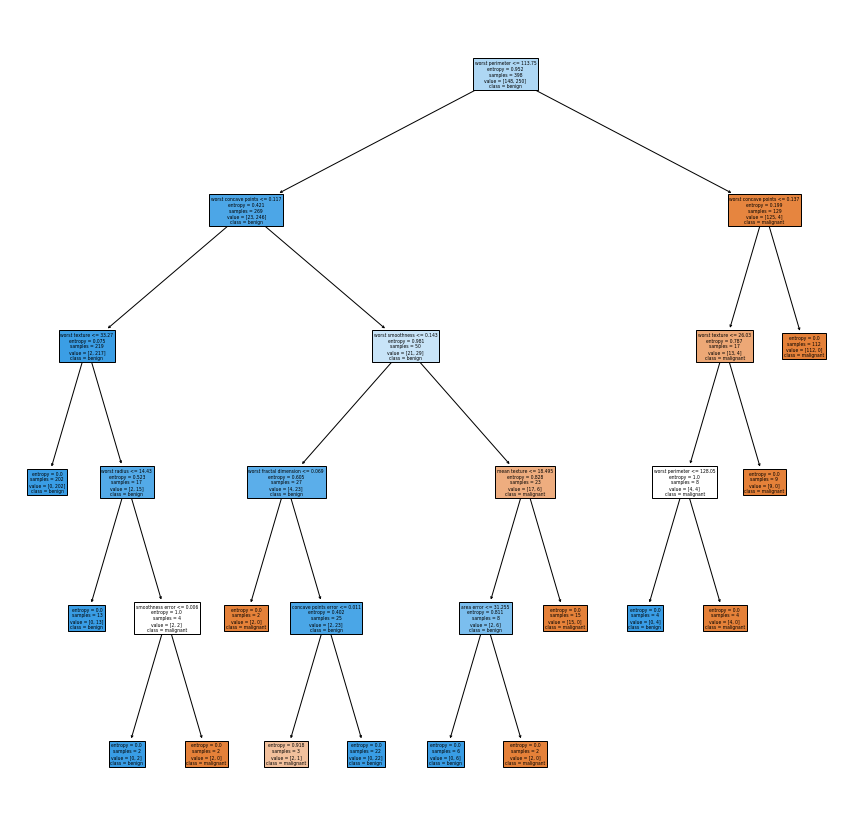

In [ ]:
plt.figure(figsize=(15,15))
clf = DecisionTreeClassifier(criterion="entropy", max_depth=depthmax+2, min_samples_split=2 )
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True, feature_names=br.feature_names, class_names=br.target_names)
plt.show()

Normalized confusion matrix
[[0.84375    0.15625   ]
 [0.05607477 0.94392523]]


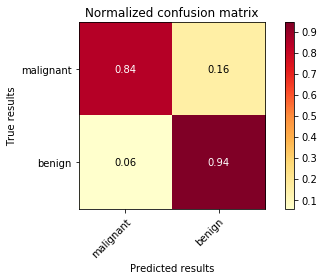

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_test_predicted =clf.predict(X_test)
confusion_matrix(y_test, y_test_predicted)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.YlOrRd):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True results',
           xlabel='Predicted results')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test, y_test_predicted, br.target_names, normalize=True)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(clf, br.data, br.target, cv=5)

cr=classification_report(br.target, predictions, target_names=br.target_names)
print(cr)

              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91       212
      benign       0.95      0.95      0.95       357

    accuracy                           0.94       569
   macro avg       0.93      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



En la celda anterior analizamos la precisión y exhaustividad. La precisión indica cuántos casos seleccionados son relevantes, y la exhaustividad indica cuántos casos relevantes son seleccionados. 


*   Un 8% de los tumores diagnosticados como malignos eran en realidad benignos,
*   Un 9% de los tumores malignos no han sido correctamente diagnosticados.
*   Un 5% de los tumores diagnosticados como benignos eran en realidad malignos.
*   Un 5% de los tumores benignos no han sido correctamente diagnosticados.


El valor F es un valor único ponderado de la precisión y la exhaustividad. *Support* indica la cantidad de instancias a la que se refiere el parámetro (hay 212 tumores malignos y 357 tumores benignos). La exactitud (*accuracy*) es de un 94%.

#K-NN

Cuando realizamos el árbol de decisión óptimo, nos da pistas a qué variables elegir para realizar el k-NN. En nuestro caso usaremos las variables *worst perimeter*, *worst concave points* Y *worst texture* (porque tienen mayor entropía en el árbol de decisión).

(También podríamos elegir las variables que usaríamos en base a la inspección visual `sns.pairplot(df, corner=True, hue="tumor_type", height=3)` ,pero creemos que es mejor opción guiarnos por el árbol).

Como k-NN funciona en base a las distancias métricas, se aconseja normalizar las variables anteriormente:

In [ ]:
#normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(br.data)
br['data_scaled'] = scaler.transform(br.data)
dfsc = pd.DataFrame(data=br['data_scaled'], columns=br['feature_names'])
dfsc['result'] = br['target']
dfsc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,-9.076415e-16,-8.853492e-16,1.773674e-15,-8.291551e-16,-7.541809e-16,-3.921877e-16,7.917900e-16,-2.739461e-16,-3.108234e-16,-3.366766e-16,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


In [ ]:
#k-NN
from sklearn.model_selection import cross_validate
accuracy_mean = []
accuracy_std = []

k_values = range(1,20)
for k in k_values: 
    # Entrenar y validar
    clfknn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_validate(clfknn, br.data_scaled, br.target, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.9507518796992482,
 0.9507518796992482,
 0.9647869674185465,
 0.9647869674185463,
 0.9666353383458647,
 0.9648496240601503,
 0.9683897243107771,
 0.9666040100250625,
 0.9648496240601503,
 0.9683583959899748,
 0.9683897243107769,
 0.9648496240601503,
 0.9666353383458647,
 0.963063909774436,
 0.963095238095238,
 0.963095238095238,
 0.963095238095238,
 0.963095238095238,
 0.9613095238095237]

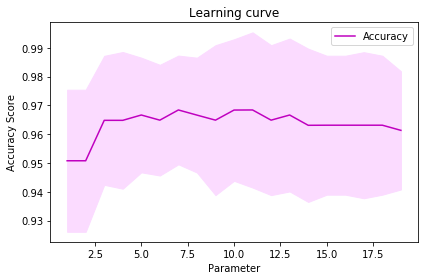

In [ ]:
plt.plot(k_values, accuracy_mean, color="m", label="Accuracy")
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#FBDBFF")
plt.title("Learning curve")
plt.xlabel("Parameter"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El k que elegiremos será 7: como podemos ver en las celdas anteriores cuando k=7 tenemos la mayor exactitud en el rango explorado.

In [ ]:
clfknn = KNeighborsClassifier(n_neighbors=7, weights='distance')
predictions = cross_val_predict(clfknn, br.data, br.target, cv=5)

clre=classification_report(br.target, predictions, target_names=br.target_names)
print(clre)

              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89       212
      benign       0.92      0.97      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.92      0.92       569



Al comparar los resultados con los del árbol de decisiones, podemos ver que tanto ambos valores F como la exactitud son menores usando k-NN en vez del árbol, por tanto, podemos concluir que es más informativo el árbol de decisión. 